# Data Setup

**Note:**  
This notebook expects the dataset `insurance.csv` to be located at `data/raw/archive/insurance.csv` relative to the notebook.  
If you do not have the file, download it from [Kaggle - Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance) and place it in the folder `data/raw/archive/`.

If the file is missing, you will see a `FileNotFoundError`.

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
data_path = '../data/raw/archive/insurance.csv'
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Data file not found at {data_path}. Please download and place it in the correct folder.")

df = pd.read_csv(data_path)

# Initial exploration
print("Dataset Shape:\n", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
display(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique Values per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Dataset Shape:
 (1338, 7)

First 5 rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary Statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Unique Values per Column:
age: 47 unique values
sex: 2 unique values
bmi: 548 unique values
children: 6 unique values
smoker: 2 unique values
region: 4 unique values
charges: 1337 unique values


Duplicate rows: 0

Value counts for categorical variables:

sex:
sex
male      675
female    662
Name: count, dtype: int64

smoker:
smoker
no     1063
yes     274
Name: count, dtype: int64

region:
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


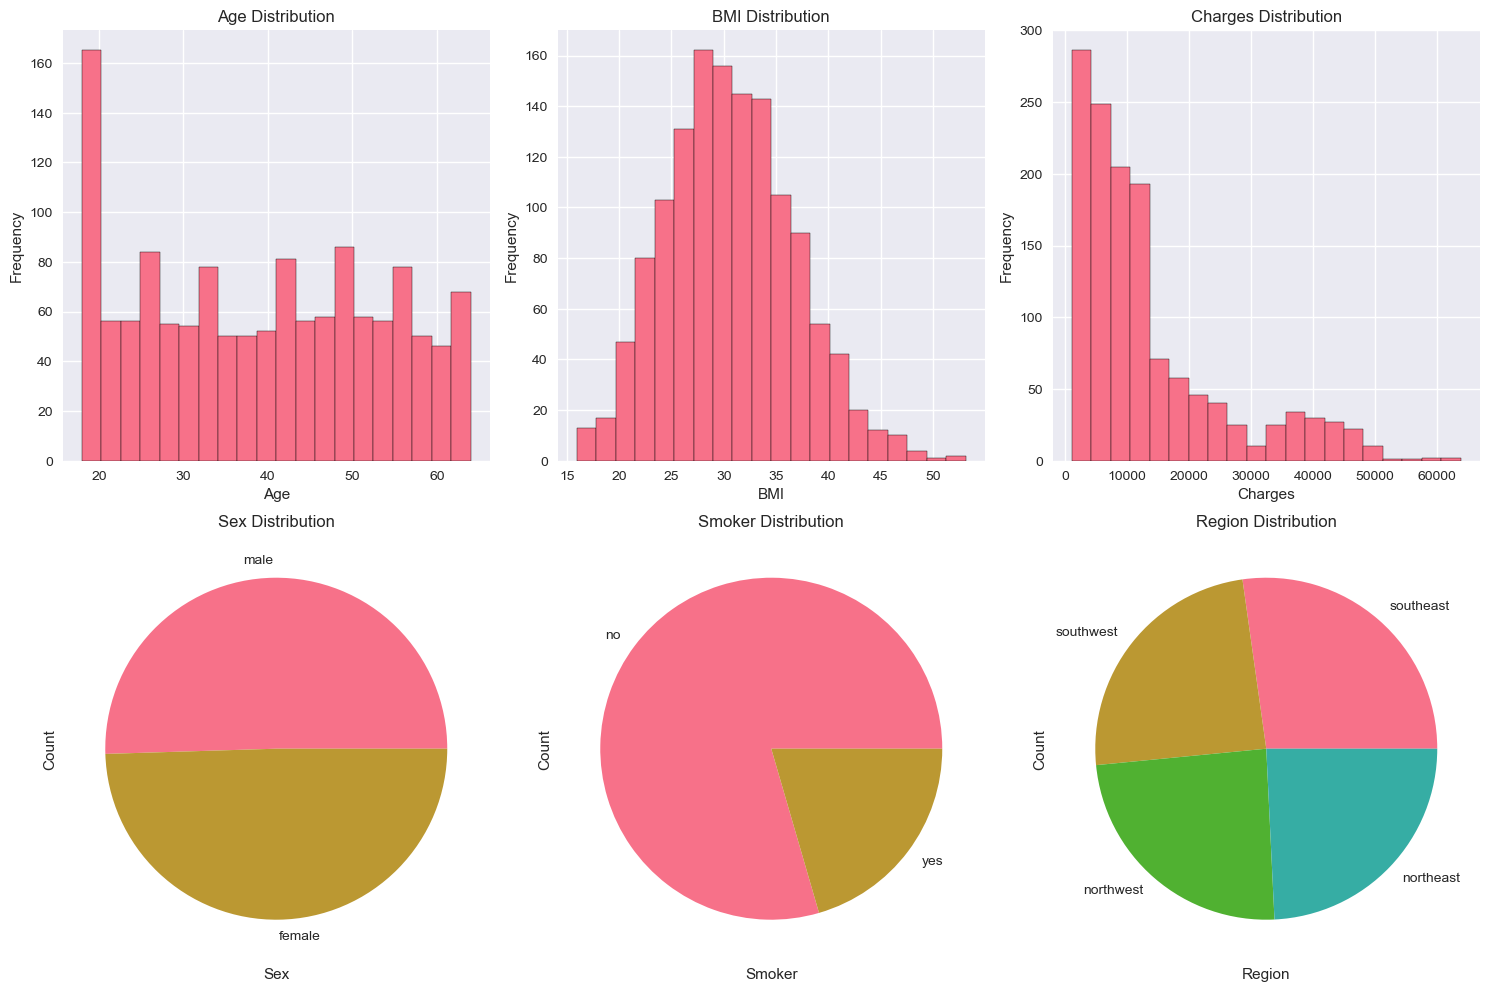

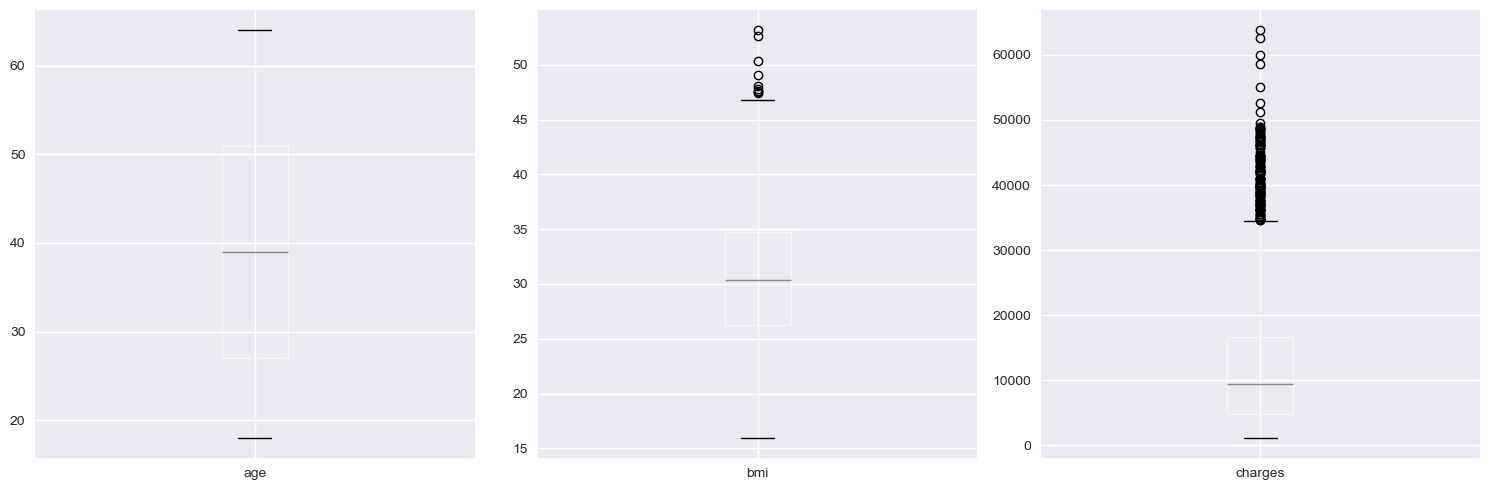

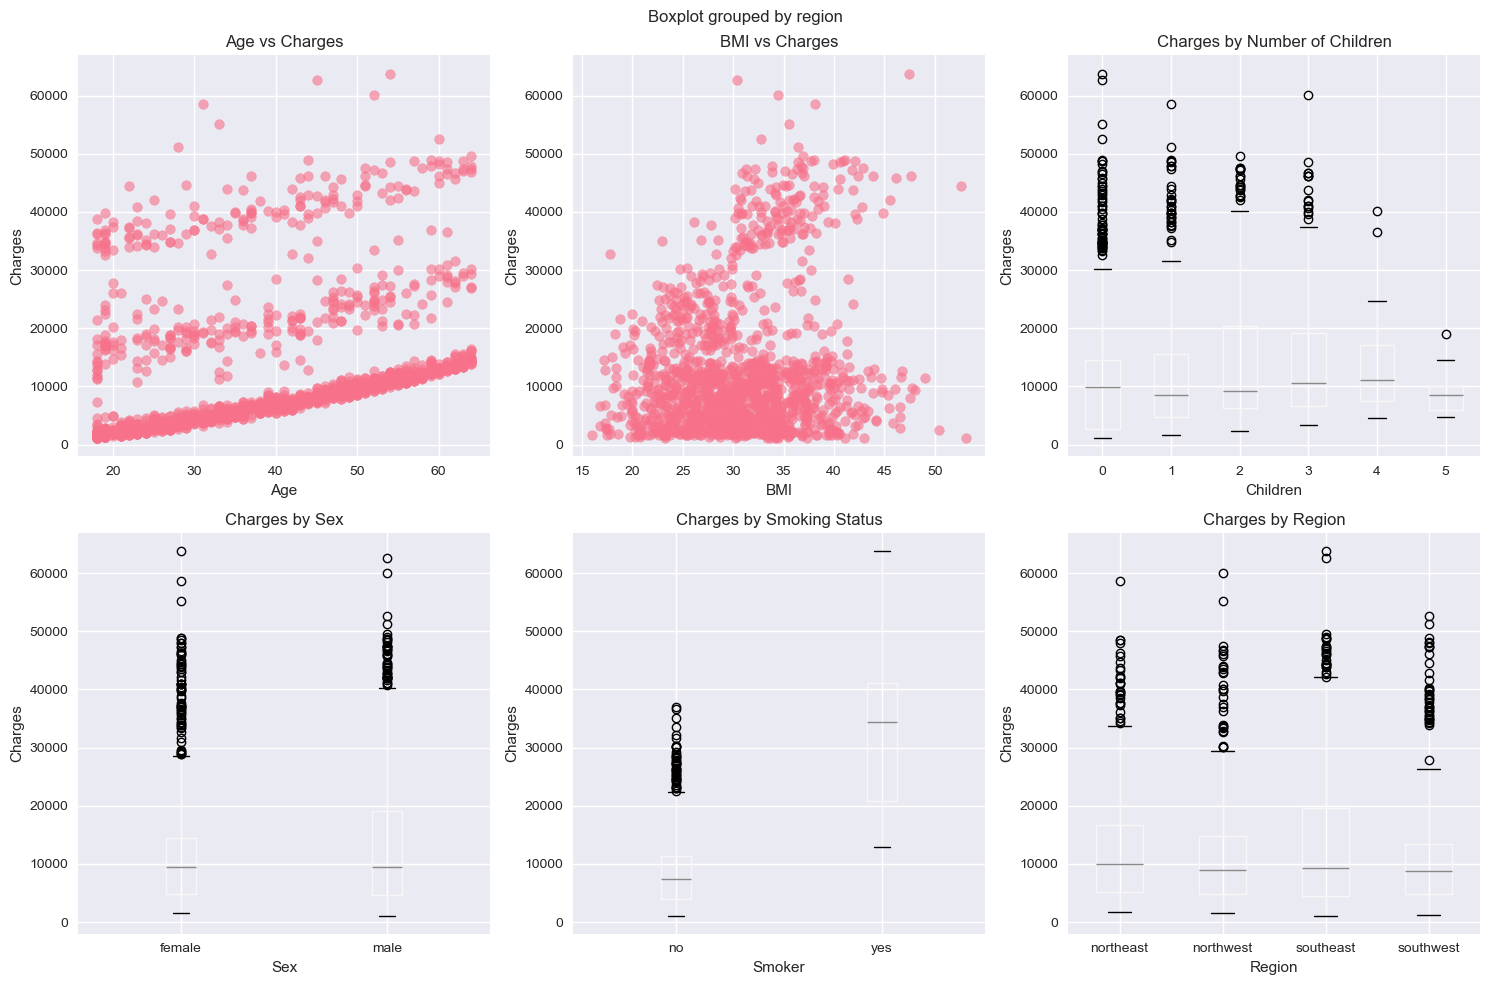

In [16]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")
# Remove duplicates if any
df = df.drop_duplicates()

# Examine categorical variables
print("\nValue counts for categorical variables:")
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Visualize distributions
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Age distribution
axes[0, 0].hist(df['age'], bins=20, edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# BMI distribution
axes[0, 1].hist(df['bmi'], bins=20, edgecolor='black')
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

# Charges distribution (target variable)
axes[0, 2].hist(df['charges'], bins=20, edgecolor='black')
axes[0, 2].set_title('Charges Distribution')
axes[0, 2].set_xlabel('Charges')
axes[0, 2].set_ylabel('Frequency')

# Sex distribution
df['sex'].value_counts().plot(kind='pie', ax=axes[1, 0])
axes[1, 0].set_title('Sex Distribution')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Count')

# Smoker distribution
df['smoker'].value_counts().plot(kind='pie', ax=axes[1, 1])
axes[1, 1].set_title('Smoker Distribution')
axes[1, 1].set_xlabel('Smoker')
axes[1, 1].set_ylabel('Count')

# Region distribution
df['region'].value_counts().plot(kind='pie', ax=axes[1, 2])
axes[1, 2].set_title('Region Distribution')
axes[1, 2].set_xlabel('Region')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Check for outliers in numerical columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
df.boxplot(column='age', ax=axes[0])
df.boxplot(column='bmi', ax=axes[1])
df.boxplot(column='charges', ax=axes[2])
plt.tight_layout()
plt.show()

# Explore relationships with target variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Age vs Charges
axes[0, 0].scatter(df['age'], df['charges'], alpha=0.6)
axes[0, 0].set_title('Age vs Charges')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Charges')

# BMI vs Charges
axes[0, 1].scatter(df['bmi'], df['charges'], alpha=0.6)
axes[0, 1].set_title('BMI vs Charges')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Charges')

# Children vs Charges
df.boxplot(column='charges', by='children', ax=axes[0, 2])
axes[0, 2].set_title('Charges by Number of Children')
axes[0, 2].set_xlabel('Children')
axes[0, 2].set_ylabel('Charges')

# Sex vs Charges
df.boxplot(column='charges', by='sex', ax=axes[1, 0])
axes[1, 0].set_title('Charges by Sex')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Charges')

# Smoker vs Charges
df.boxplot(column='charges', by='smoker', ax=axes[1, 1])
axes[1, 1].set_title('Charges by Smoking Status')
axes[1, 1].set_xlabel('Smoker')
axes[1, 1].set_ylabel('Charges')

# Region vs Charges
df.boxplot(column='charges', by='region', ax=axes[1, 2])
axes[1, 2].set_title('Charges by Region')
axes[1, 2].set_xlabel('Region')
axes[1, 2].set_ylabel('Charges')

plt.tight_layout()
plt.show()